# FRE 521D: Data Analytics in Climate, Food and Environment
## Lecture 11: Visualization I - Matplotlib, Plotly, and Storytelling

**Date:** Monday, February 9, 2026  
**Instructor:** Asif Ahmed Neloy  
**Program:** UBC Master of Food and Resource Economics

---

### Today's Agenda

1. Principles of Effective Visualization
2. Matplotlib Fundamentals
3. Common Chart Types and When to Use Them
4. Customizing Matplotlib Plots
5. Introduction to Plotly for Interactive Charts
6. Time Series Visualization
7. Multi-Panel Figures
8. Storytelling with Data
9. Accessibility and Color Choices

---

## Learning Objectives

By the end of this lecture, you will be able to:

1. Choose appropriate chart types for different data and questions
2. Create publication-quality static visualizations with Matplotlib
3. Build interactive dashboards with Plotly
4. Visualize time series data effectively
5. Design multi-panel figures that tell a coherent story
6. Apply principles of accessibility and good design
7. Export figures in various formats for reports and presentations

---

## Setting Up

In [1]:
# Standard imports
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set matplotlib defaults for better-looking plots
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Current time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("Ready for Visualization!")

Matplotlib version: 3.10.5
Pandas version: 2.3.1
Current time: 2026-02-02 09:56:59
Ready for Visualization!


We import both Matplotlib and Plotly. Matplotlib is the foundational plotting library in Python, while Plotly provides interactive visualizations that work well in web browsers and notebooks.

The `rcParams` settings establish consistent defaults for our figures.

---

## Load Our Datasets

In [2]:
# Load climate change indicators
climate_path = '../../Datasets/climate_change_indicators.csv'
df_climate = pd.read_csv(climate_path, encoding='utf-8-sig')

print(f"Climate Data: {df_climate.shape[0]} rows, {df_climate.shape[1]} columns")
print(f"Columns: {df_climate.columns[:10].tolist()} ...")

Climate Data: 225 rows, 72 columns
Columns: ['ObjectId', 'Country', 'ISO2', 'ISO3', 'Indicator', 'Unit', 'Source', 'CTS_Code', 'CTS_Name', 'CTS_Full_Descriptor'] ...


In [3]:
# Load weather data
weather_path = '../../Datasets/GlobalWeatherRepository.csv'
df_weather = pd.read_csv(weather_path)

print(f"Weather Data: {df_weather.shape[0]:,} rows, {df_weather.shape[1]} columns")

Weather Data: 43,884 rows, 41 columns


In [4]:
# Prepare climate data for visualization
# The data is in wide format with years as columns (F1961, F1962, ...)

# Identify year columns
year_cols = [c for c in df_climate.columns if c.startswith('F') and c[1:].isdigit()]
print(f"Year columns found: {len(year_cols)} ({year_cols[0]} to {year_cols[-1]})")

# Melt to long format for easier plotting
df_climate_long = df_climate.melt(
    id_vars=['Country', 'ISO3'],
    value_vars=year_cols,
    var_name='year_col',
    value_name='temp_anomaly'
)

# Extract year as integer
df_climate_long['year'] = df_climate_long['year_col'].str[1:].astype(int)

# Drop the intermediate column
df_climate_long = df_climate_long.drop(columns=['year_col'])

print(f"\nReshaped data: {df_climate_long.shape[0]:,} rows")
print(df_climate_long.head())

Year columns found: 62 (F1961 to F2022)

Reshaped data: 13,950 rows
                        Country ISO3  temp_anomaly  year
0  Afghanistan, Islamic Rep. of  AFG        -0.113  1961
1                       Albania  ALB         0.627  1961
2                       Algeria  DZA         0.164  1961
3                American Samoa  ASM         0.079  1961
4      Andorra, Principality of  AND         0.736  1961


We transformed the climate data from wide format (years as columns) to long format (year as a variable). This "tidy" format is much easier to visualize and analyze.

---

## 1. Principles of Effective Visualization

### The Purpose of Visualization

Visualization serves three main purposes:

```
┌─────────────────────────────────────────────────────────────────┐
│              WHY WE VISUALIZE DATA                              │
├─────────────────────────────────────────────────────────────────┤
│                                                                 │
│  1. EXPLORATION         2. EXPLANATION        3. COMMUNICATION  │
│  ├── Find patterns      ├── Test hypotheses   ├── Tell stories  │
│  ├── Spot outliers      ├── Show evidence     ├── Persuade      │
│  ├── Generate ideas     ├── Answer questions  ├── Inform        │
│  └── Quick and rough    └── Accurate          └── Beautiful     │
│                                                                 │
└─────────────────────────────────────────────────────────────────┘
```

### Key Principles

1. **Show the data**: Don't hide information behind unnecessary decoration
2. **Facilitate comparisons**: Make it easy to compare values
3. **Tell a story**: Every chart should answer a question
4. **Reduce cognitive load**: Simple is better than complex
5. **Be honest**: Don't mislead with scale or cherry-picked data

---

## 2. Matplotlib Fundamentals

### The Anatomy of a Figure

```
┌─────────────────────────────────────────────────────────────────┐
│  FIGURE (the whole image)                                       │
│  ┌─────────────────────────────────────────────────────────┐   │
│  │  AXES (the actual plot)                                  │   │
│  │                                                          │   │
│  │     Title                                                │   │
│  │  Y  ┌────────────────────────────────────────────┐      │   │
│  │  L  │                                            │      │   │
│  │  a  │           Plot Area                        │ Legend│   │
│  │  b  │                                            │      │   │
│  │  e  │                                            │      │   │
│  │  l  └────────────────────────────────────────────┘      │   │
│  │                    X Label                               │   │
│  └─────────────────────────────────────────────────────────┘   │
└─────────────────────────────────────────────────────────────────┘
```

- **Figure**: The entire image/window
- **Axes**: A single plot within the figure (can have multiple)
- **Axis**: The x-axis or y-axis with ticks and labels

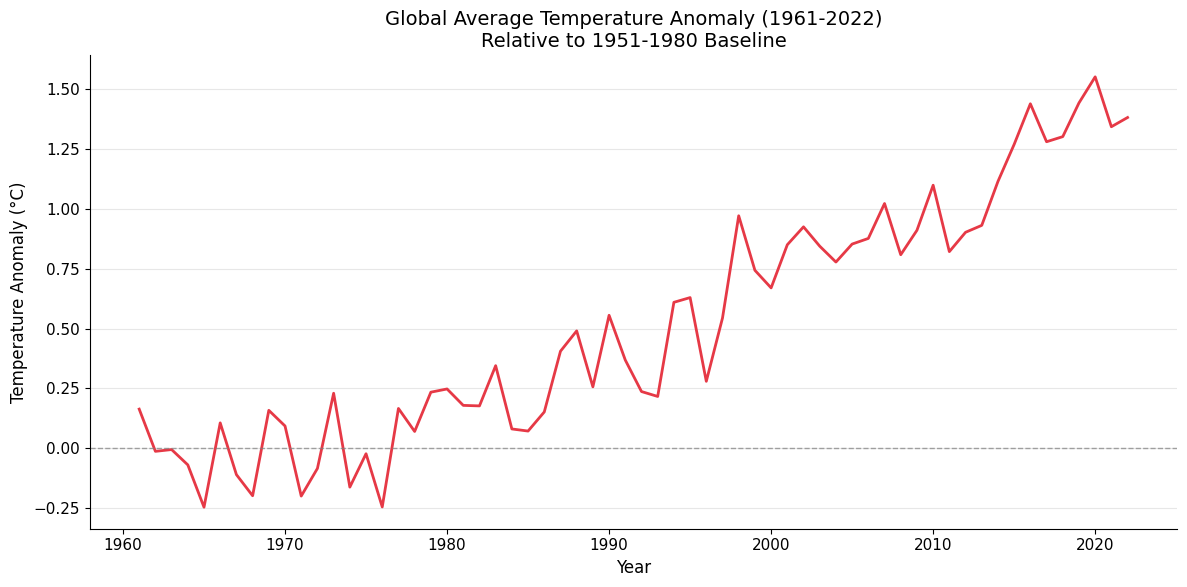

In [5]:
# Basic line plot - Global average temperature anomaly over time

# Calculate global average per year
global_avg = df_climate_long.groupby('year')['temp_anomaly'].mean().reset_index()

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(global_avg['year'], global_avg['temp_anomaly'], 
        color='#E63946', linewidth=2)

# Add a horizontal line at zero (baseline)
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Anomaly (°C)')
ax.set_title('Global Average Temperature Anomaly (1961-2022)\nRelative to 1951-1980 Baseline')

# Clean up the appearance
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Grid for readability
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

This basic line plot shows the trend in global temperature anomalies. Key design choices:

1. **Horizontal reference line**: Shows the baseline (zero anomaly)
2. **Removed top and right spines**: Cleaner appearance
3. **Y-axis grid only**: Helps read values without cluttering
4. **Descriptive title**: Explains what the data shows

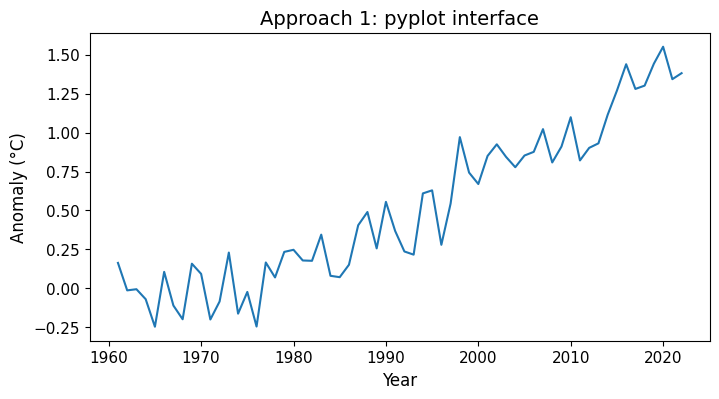

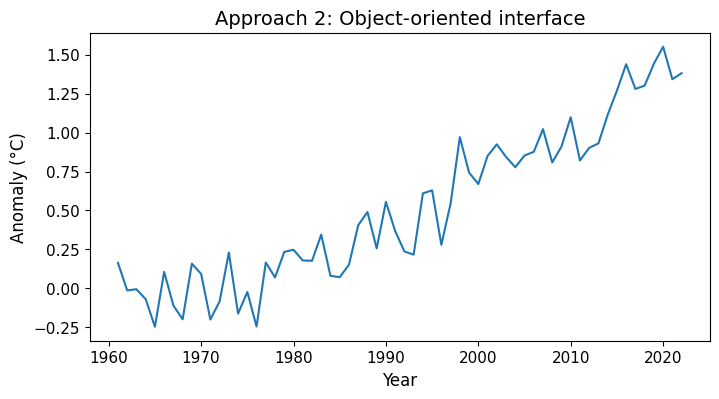

In [6]:
# Two plotting approaches in Matplotlib

# Approach 1: pyplot interface (quick, simple)
plt.figure(figsize=(8, 4))
plt.plot(global_avg['year'], global_avg['temp_anomaly'])
plt.title('Approach 1: pyplot interface')
plt.xlabel('Year')
plt.ylabel('Anomaly (°C)')
plt.show()

# Approach 2: Object-oriented interface (more control)
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(global_avg['year'], global_avg['temp_anomaly'])
ax.set_title('Approach 2: Object-oriented interface')
ax.set_xlabel('Year')
ax.set_ylabel('Anomaly (°C)')
plt.show()

Both approaches produce the same result, but the object-oriented approach (fig, ax) gives you more control and is preferred for complex figures with multiple subplots.

---

## 3. Common Chart Types and When to Use Them

### Chart Selection Guide

| Chart Type | Use When | Example |
|------------|----------|----------|
| Line | Showing trends over time | Temperature over years |
| Bar | Comparing categories | Emissions by country |
| Scatter | Showing relationships | Yield vs rainfall |
| Histogram | Showing distribution | Temperature distribution |
| Box plot | Comparing distributions | Temperature by region |
| Heatmap | Showing patterns in matrix | Correlation matrix |

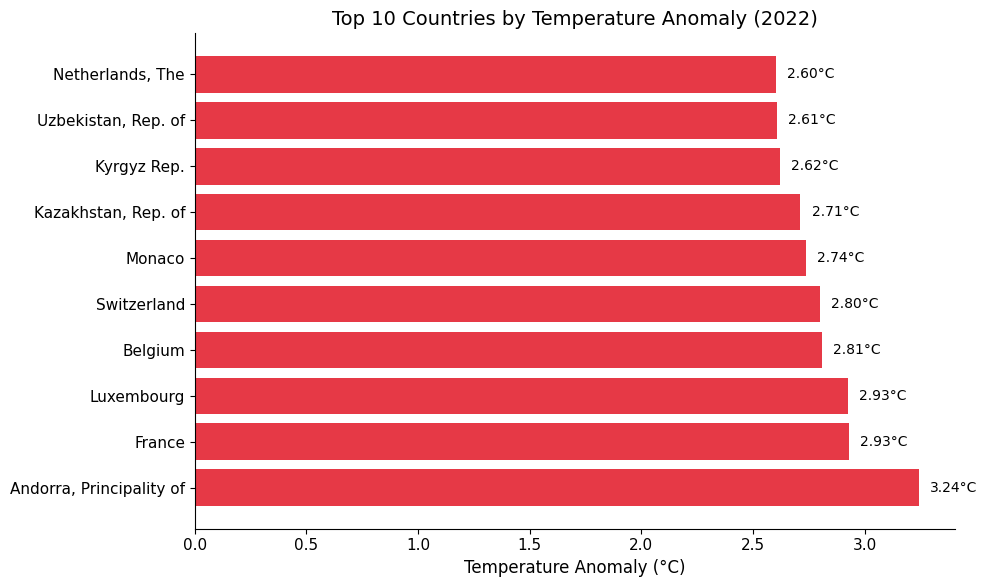

In [7]:
# Bar Chart - Top 10 countries by 2022 temperature anomaly

# Get 2022 data
df_2022 = df_climate_long[df_climate_long['year'] == 2022].copy()
df_2022 = df_2022.dropna(subset=['temp_anomaly'])
top_10 = df_2022.nlargest(10, 'temp_anomaly')

# Create bar chart
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.barh(top_10['Country'], top_10['temp_anomaly'], color='#E63946')

# Add value labels on bars
for bar, value in zip(bars, top_10['temp_anomaly']):
    ax.text(value + 0.05, bar.get_y() + bar.get_height()/2, 
            f'{value:.2f}°C', va='center', fontsize=10)

ax.set_xlabel('Temperature Anomaly (°C)')
ax.set_title('Top 10 Countries by Temperature Anomaly (2022)')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Horizontal bar charts are excellent for categorical comparisons, especially when category names are long. The value labels directly on the bars eliminate the need to reference the axis.

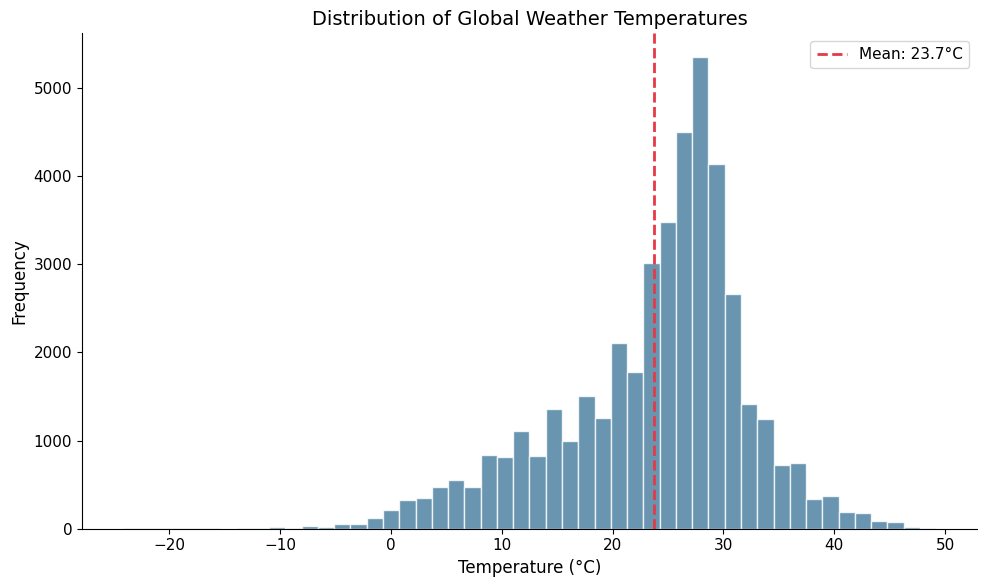

In [8]:
# Histogram - Distribution of temperature values in weather data

fig, ax = plt.subplots(figsize=(10, 6))

# Create histogram
ax.hist(df_weather['temperature_celsius'].dropna(), 
        bins=50, 
        color='#457B9D', 
        edgecolor='white',
        alpha=0.8)

# Add mean line
mean_temp = df_weather['temperature_celsius'].mean()
ax.axvline(mean_temp, color='#E63946', linestyle='--', linewidth=2, 
           label=f'Mean: {mean_temp:.1f}°C')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Global Weather Temperatures')
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Histograms reveal the distribution shape. Adding the mean as a reference line helps readers understand where the center of the distribution lies.

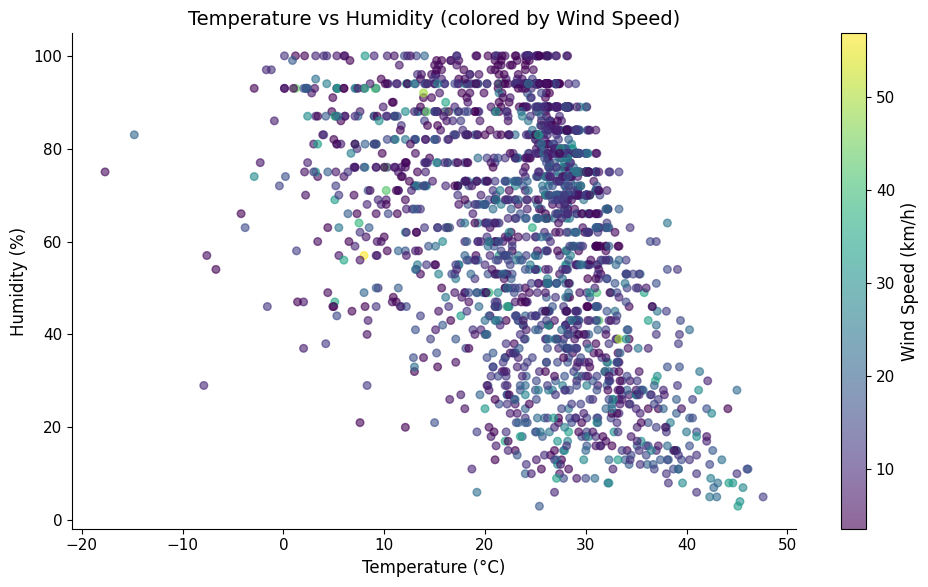

In [9]:
# Scatter plot - Temperature vs Humidity relationship

# Sample for performance (plotting 44K points is slow)
sample = df_weather.sample(n=2000, random_state=42)

fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    sample['temperature_celsius'],
    sample['humidity'],
    c=sample['wind_kph'],  # Color by wind speed
    cmap='viridis',
    alpha=0.6,
    s=30
)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Wind Speed (km/h)')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_title('Temperature vs Humidity (colored by Wind Speed)')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Scatter plots show relationships between two numeric variables. Using color for a third variable adds an extra dimension of information without requiring a 3D plot.

---

## 4. Customizing Matplotlib Plots

### Colors, Fonts, and Styles

Matplotlib offers extensive customization options. Let's build a polished, publication-ready figure.

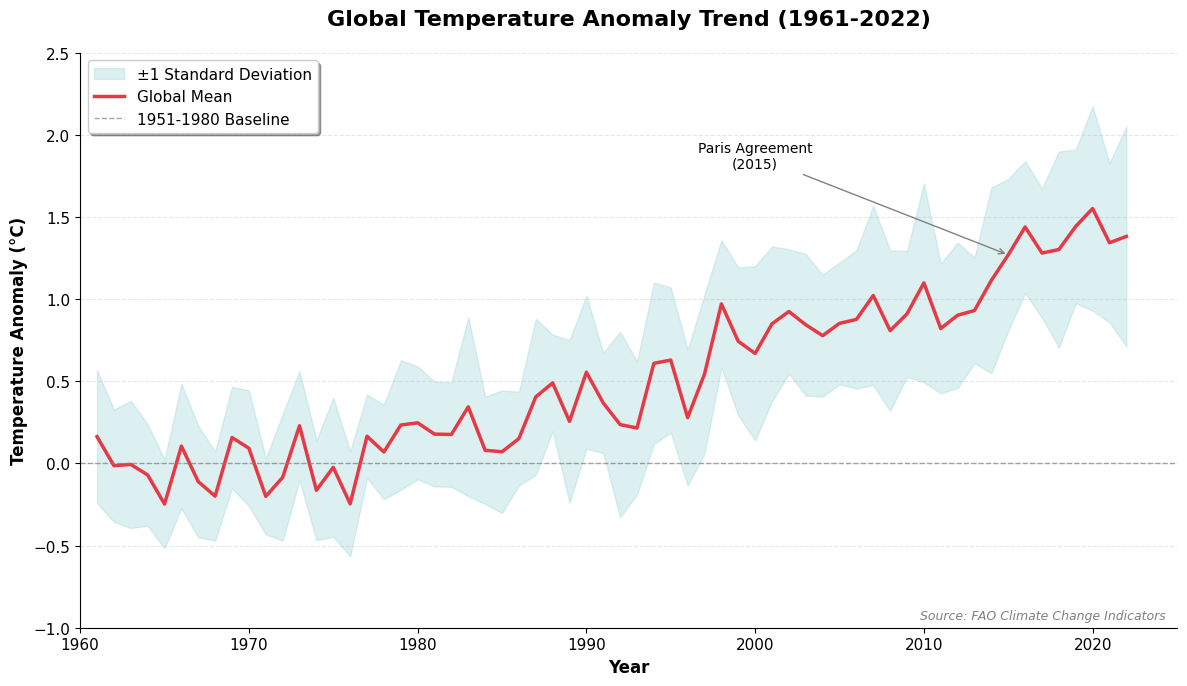

In [10]:
# Define a custom color palette
COLORS = {
    'primary': '#1D3557',     # Dark blue
    'secondary': '#457B9D',   # Medium blue
    'accent': '#E63946',      # Red
    'light': '#A8DADC',       # Light blue
    'background': '#F1FAEE',  # Off-white
}

# Publication-quality temperature trend
fig, ax = plt.subplots(figsize=(12, 7))

# Plot data with confidence band
yearly_stats = df_climate_long.groupby('year')['temp_anomaly'].agg(['mean', 'std']).reset_index()

# Confidence band
ax.fill_between(
    yearly_stats['year'],
    yearly_stats['mean'] - yearly_stats['std'],
    yearly_stats['mean'] + yearly_stats['std'],
    color=COLORS['light'],
    alpha=0.4,
    label='±1 Standard Deviation'
)

# Main line
ax.plot(
    yearly_stats['year'], 
    yearly_stats['mean'],
    color=COLORS['accent'],
    linewidth=2.5,
    label='Global Mean'
)

# Baseline reference
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.7, label='1951-1980 Baseline')

# Annotations
ax.annotate(
    'Paris Agreement\n(2015)',
    xy=(2015, yearly_stats[yearly_stats['year']==2015]['mean'].values[0]),
    xytext=(2000, 1.8),
    fontsize=10,
    arrowprops=dict(arrowstyle='->', color='gray'),
    ha='center'
)

# Styling
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Temperature Anomaly (°C)', fontsize=12, fontweight='bold')
ax.set_title(
    'Global Temperature Anomaly Trend (1961-2022)',
    fontsize=16, fontweight='bold', pad=20
)

ax.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Set axis limits
ax.set_xlim(1960, 2025)
ax.set_ylim(-1, 2.5)

# Add source annotation
ax.text(
    0.99, 0.01,
    'Source: FAO Climate Change Indicators',
    transform=ax.transAxes,
    fontsize=9,
    ha='right',
    va='bottom',
    style='italic',
    color='gray'
)

plt.tight_layout()
plt.show()

This publication-quality figure includes several important elements:

1. **Confidence band**: Shows uncertainty/variability around the mean
2. **Annotation with arrow**: Highlights a key event (Paris Agreement)
3. **Legend**: Explains all visual elements
4. **Source citation**: Essential for credibility
5. **Consistent color palette**: Professional appearance

---

## 5. Introduction to Plotly for Interactive Charts

### Why Plotly?

Plotly creates interactive HTML-based visualizations:
- **Hover information**: See exact values
- **Zoom and pan**: Explore data interactively
- **Click to filter**: Toggle data series
- **Export**: Save as PNG or interactive HTML

In [11]:
# Plotly Express - Quick interactive line chart

# Select a few countries to compare
countries = ['Canada', 'Brazil', 'Germany', 'India', 'Australia']
df_selected = df_climate_long[df_climate_long['Country'].isin(countries)]

fig = px.line(
    df_selected,
    x='year',
    y='temp_anomaly',
    color='Country',
    title='Temperature Anomaly Trends by Country',
    labels={
        'year': 'Year',
        'temp_anomaly': 'Temperature Anomaly (°C)',
        'Country': 'Country'
    }
)

fig.update_layout(
    hovermode='x unified',
    legend=dict(yanchor='top', y=0.99, xanchor='left', x=0.01)
)

fig.show()

With Plotly Express, you get interactivity with minimal code. Users can:
- Hover to see exact values
- Click legend items to show/hide countries
- Zoom into specific time periods

In [12]:
# Plotly scatter with trendline

# Sample weather data
sample = df_weather.sample(n=1000, random_state=42)

fig = px.scatter(
    sample,
    x='temperature_celsius',
    y='humidity',
    color='condition_text',
    size='wind_kph',
    hover_data=['country', 'location_name'],
    title='Temperature vs Humidity by Weather Condition',
    labels={
        'temperature_celsius': 'Temperature (°C)',
        'humidity': 'Humidity (%)',
        'condition_text': 'Condition',
        'wind_kph': 'Wind (km/h)'
    }
)

fig.update_layout(
    legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1)
)

fig.show()

This scatter plot uses four visual channels:
1. **Position (x, y)**: Temperature and humidity
2. **Color**: Weather condition
3. **Size**: Wind speed
4. **Hover**: Country and location details

In [13]:
# Plotly box plot - Temperature distribution by condition

# Get top 8 most common conditions
top_conditions = df_weather['condition_text'].value_counts().head(8).index.tolist()
df_conditions = df_weather[df_weather['condition_text'].isin(top_conditions)]

fig = px.box(
    df_conditions,
    x='condition_text',
    y='temperature_celsius',
    color='condition_text',
    title='Temperature Distribution by Weather Condition',
    labels={
        'condition_text': 'Weather Condition',
        'temperature_celsius': 'Temperature (°C)'
    }
)

fig.update_layout(showlegend=False)
fig.show()

Box plots are excellent for comparing distributions across categories. The interactive version lets you hover over each component (median, quartiles, outliers) to see exact values.

---

## 6. Time Series Visualization

### Techniques for Temporal Data

Time series data has unique visualization challenges:
- **Long time ranges**: Need to show both detail and trend
- **Seasonality**: Patterns that repeat
- **Multiple series**: Comparing different entities over time

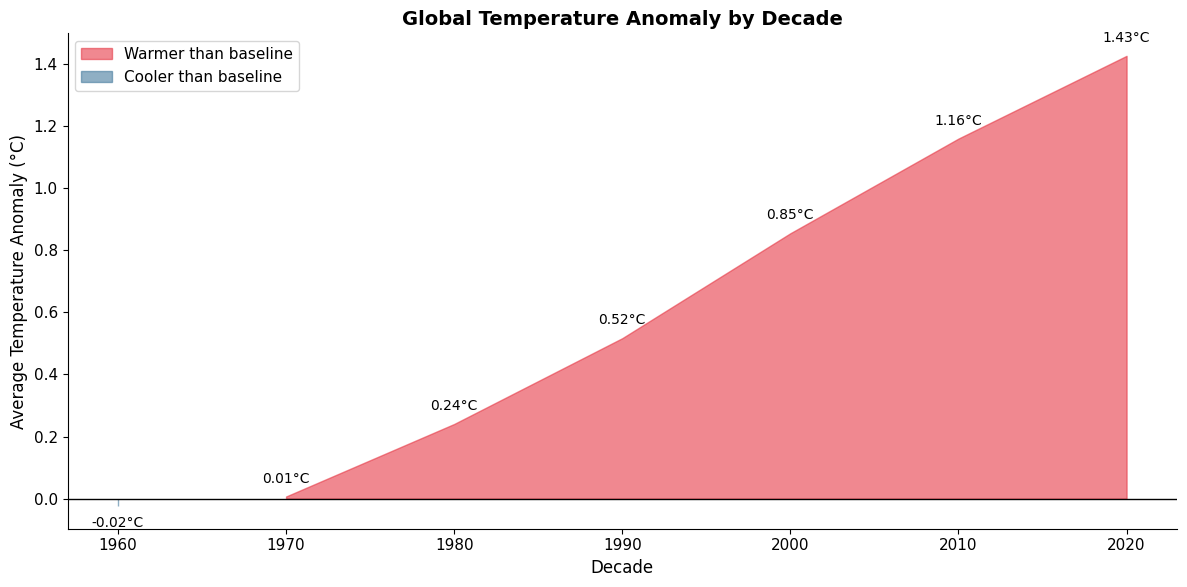

In [14]:
# Area chart showing temperature anomaly by decade

# Add decade column
df_climate_long['decade'] = (df_climate_long['year'] // 10) * 10

# Calculate average anomaly by decade
decade_avg = df_climate_long.groupby('decade')['temp_anomaly'].mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))

# Create area chart
ax.fill_between(
    decade_avg['decade'],
    0,
    decade_avg['temp_anomaly'],
    where=(decade_avg['temp_anomaly'] >= 0),
    color='#E63946',
    alpha=0.6,
    label='Warmer than baseline'
)

ax.fill_between(
    decade_avg['decade'],
    0,
    decade_avg['temp_anomaly'],
    where=(decade_avg['temp_anomaly'] < 0),
    color='#457B9D',
    alpha=0.6,
    label='Cooler than baseline'
)

ax.axhline(y=0, color='black', linewidth=1)

# Add decade labels
for _, row in decade_avg.iterrows():
    ax.annotate(
        f"{row['temp_anomaly']:.2f}°C",
        xy=(row['decade'], row['temp_anomaly']),
        xytext=(0, 10 if row['temp_anomaly'] >= 0 else -15),
        textcoords='offset points',
        ha='center',
        fontsize=10
    )

ax.set_xlabel('Decade', fontsize=12)
ax.set_ylabel('Average Temperature Anomaly (°C)', fontsize=12)
ax.set_title('Global Temperature Anomaly by Decade', fontsize=14, fontweight='bold')
ax.legend(loc='upper left')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

The area chart with contrasting colors for positive and negative values makes the warming trend immediately obvious. Aggregating by decade reduces noise and emphasizes the long-term pattern.

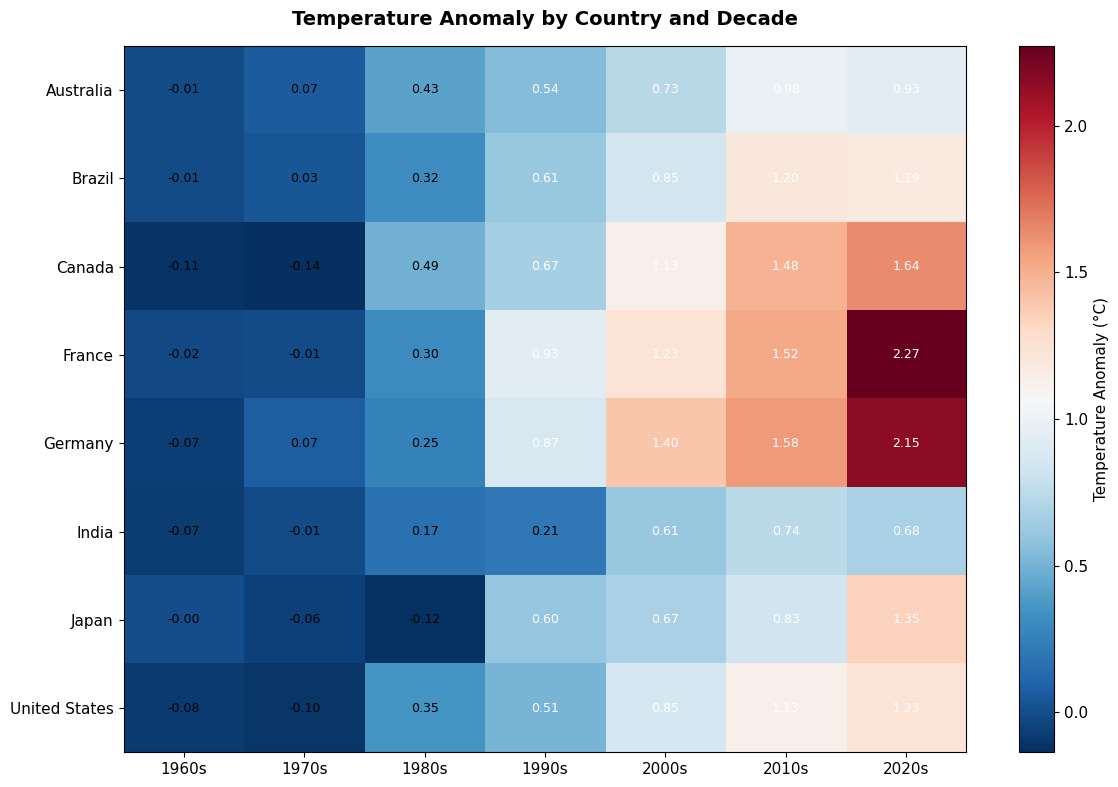

In [15]:
# Heatmap - Temperature anomaly by country and decade

# Select major countries
major_countries = ['United States', 'China', 'India', 'Brazil', 'Russia', 
                   'Germany', 'Japan', 'Canada', 'Australia', 'France']
df_major = df_climate_long[df_climate_long['Country'].isin(major_countries)]

# Pivot for heatmap
heatmap_data = df_major.pivot_table(
    values='temp_anomaly',
    index='Country',
    columns='decade',
    aggfunc='mean'
)

fig, ax = plt.subplots(figsize=(12, 8))

# Create heatmap
im = ax.imshow(heatmap_data.values, cmap='RdBu_r', aspect='auto')

# Set ticks and labels
ax.set_xticks(range(len(heatmap_data.columns)))
ax.set_xticklabels([f"{int(d)}s" for d in heatmap_data.columns])
ax.set_yticks(range(len(heatmap_data.index)))
ax.set_yticklabels(heatmap_data.index)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Temperature Anomaly (°C)', fontsize=11)

# Add value annotations
for i in range(len(heatmap_data.index)):
    for j in range(len(heatmap_data.columns)):
        val = heatmap_data.iloc[i, j]
        color = 'white' if abs(val) > 0.5 else 'black'
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color=color, fontsize=9)

ax.set_title('Temperature Anomaly by Country and Decade', fontsize=14, fontweight='bold', pad=15)

plt.tight_layout()
plt.show()

The heatmap reveals patterns across two dimensions (countries and time). The diverging color scale (blue-white-red) centered on zero makes it easy to distinguish warming from cooling.

---

## 7. Multi-Panel Figures

### When to Use Multiple Panels

Multiple panels (subplots) are useful when:
- Comparing related but distinct datasets
- Showing the same data with different views
- Building a visual narrative

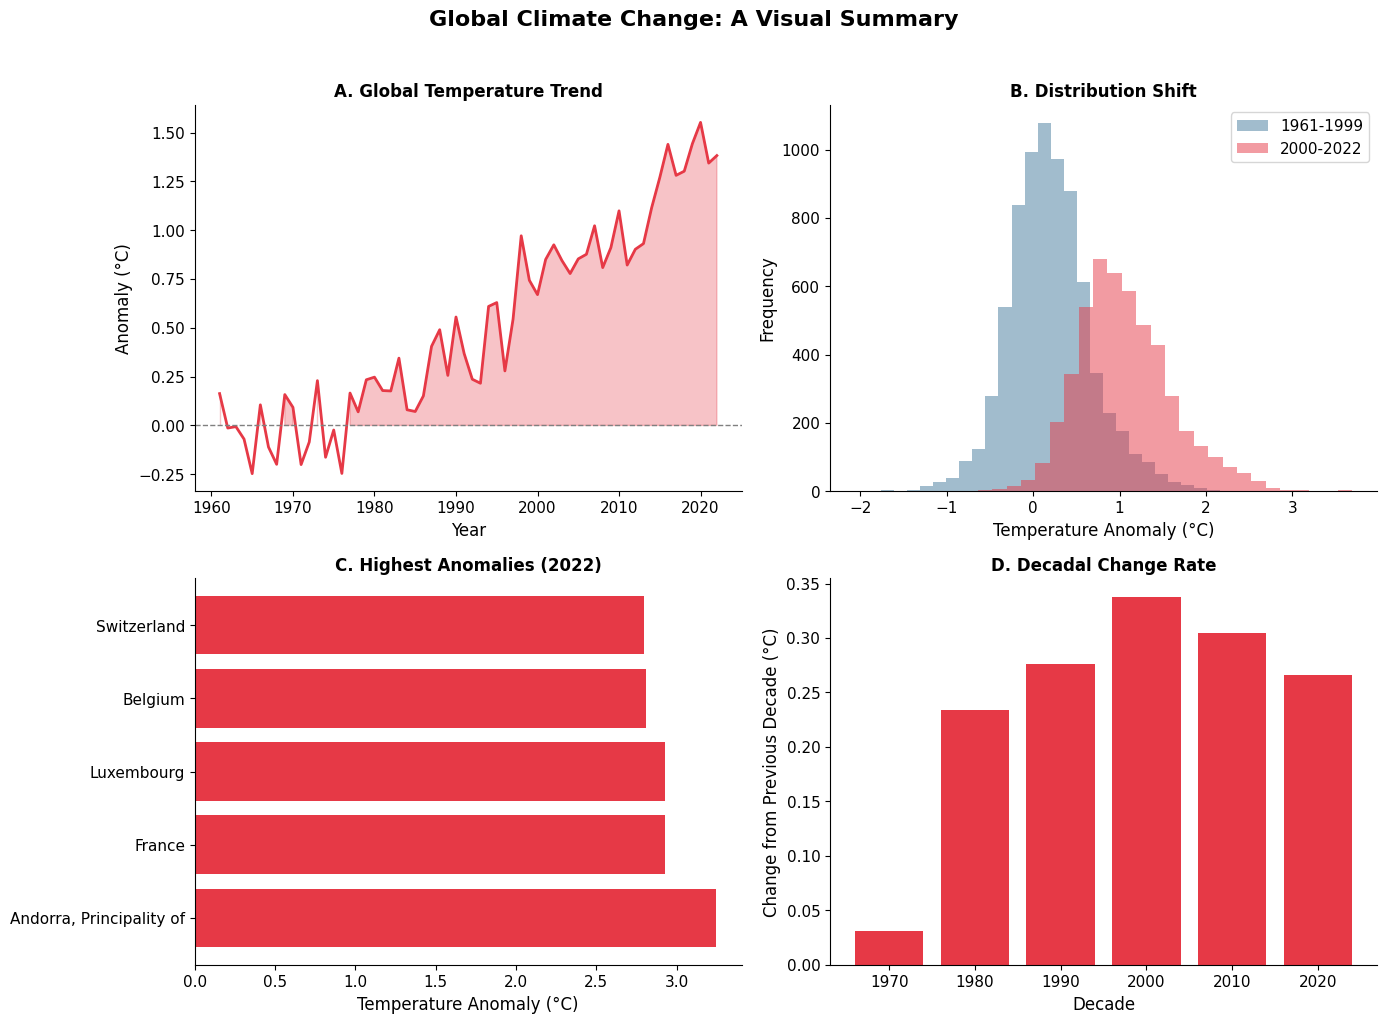

In [16]:
# Multi-panel figure: Climate story in four panels

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Panel 1: Global trend line
ax1 = axes[0, 0]
ax1.plot(yearly_stats['year'], yearly_stats['mean'], color=COLORS['accent'], linewidth=2)
ax1.fill_between(yearly_stats['year'], 0, yearly_stats['mean'], 
                 where=(yearly_stats['mean'] >= 0), color=COLORS['accent'], alpha=0.3)
ax1.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax1.set_title('A. Global Temperature Trend', fontsize=12, fontweight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Anomaly (°C)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# Panel 2: Distribution histogram
ax2 = axes[0, 1]
recent = df_climate_long[df_climate_long['year'] >= 2000]['temp_anomaly'].dropna()
historical = df_climate_long[df_climate_long['year'] < 2000]['temp_anomaly'].dropna()
ax2.hist(historical, bins=30, alpha=0.5, color=COLORS['secondary'], label='1961-1999')
ax2.hist(recent, bins=30, alpha=0.5, color=COLORS['accent'], label='2000-2022')
ax2.set_title('B. Distribution Shift', fontsize=12, fontweight='bold')
ax2.set_xlabel('Temperature Anomaly (°C)')
ax2.set_ylabel('Frequency')
ax2.legend()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Panel 3: Top warming countries (bar)
ax3 = axes[1, 0]
top_5 = df_2022.nlargest(5, 'temp_anomaly')
ax3.barh(top_5['Country'], top_5['temp_anomaly'], color=COLORS['accent'])
ax3.set_title('C. Highest Anomalies (2022)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Temperature Anomaly (°C)')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Panel 4: Rate of change by decade
ax4 = axes[1, 1]
decade_avg['change'] = decade_avg['temp_anomaly'].diff()
colors = [COLORS['accent'] if x > 0 else COLORS['secondary'] for x in decade_avg['change'].dropna()]
ax4.bar(decade_avg['decade'][1:], decade_avg['change'].dropna(), color=colors, width=8)
ax4.axhline(y=0, color='black', linewidth=0.5)
ax4.set_title('D. Decadal Change Rate', fontsize=12, fontweight='bold')
ax4.set_xlabel('Decade')
ax4.set_ylabel('Change from Previous Decade (°C)')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# Overall title
fig.suptitle('Global Climate Change: A Visual Summary', fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

This four-panel figure tells a complete story:

- **Panel A**: The overall trend (context)
- **Panel B**: How the distribution has shifted (evidence)
- **Panel C**: Which countries are most affected (detail)
- **Panel D**: The acceleration rate (insight)

Labeling panels (A, B, C, D) helps when referencing specific parts in text.

---

## 8. Storytelling with Data

### The Narrative Arc

```
┌─────────────────────────────────────────────────────────────────┐
│               DATA STORYTELLING STRUCTURE                       │
├─────────────────────────────────────────────────────────────────┤
│                                                                 │
│  1. SETUP        2. CONFLICT        3. RESOLUTION               │
│  ├── Context     ├── The problem    ├── Insights                │
│  ├── Background  ├── Key finding    ├── Implications            │
│  └── What we     └── Why it         └── What to do              │
│      know            matters             about it               │
│                                                                 │
│  Chart: Overview  Chart: Evidence    Chart: Comparison/Action   │
│                                                                 │
└─────────────────────────────────────────────────────────────────┘
```

### Key Storytelling Techniques

1. **Lead with the insight**: Don't bury the conclusion
2. **Use annotations**: Point out what matters
3. **Reduce clutter**: Remove distracting elements
4. **Guide the eye**: Use color and position strategically

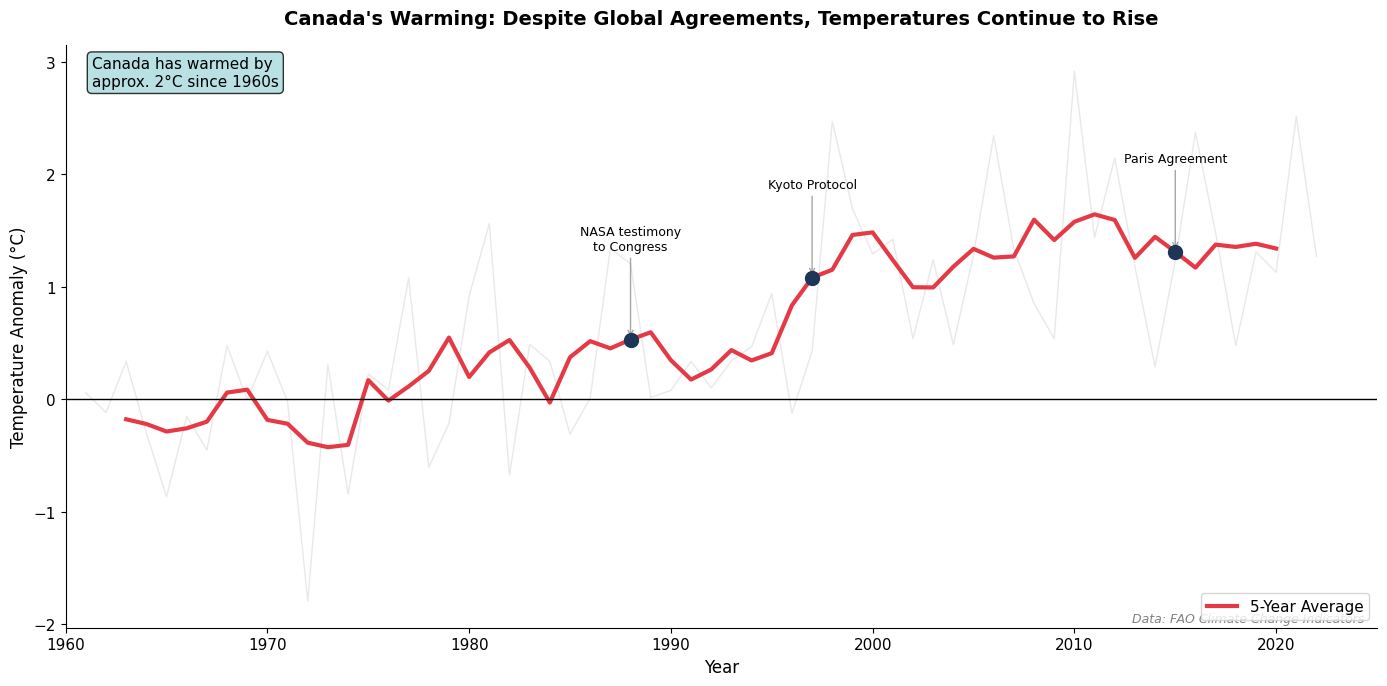

In [17]:
# Storytelling example: Canada's warming trend with key events

# Get Canada data
df_canada = df_climate_long[df_climate_long['Country'] == 'Canada'].sort_values('year')

fig, ax = plt.subplots(figsize=(14, 7))

# Base layer: all data in light gray
ax.plot(df_canada['year'], df_canada['temp_anomaly'], 
        color='lightgray', linewidth=1, alpha=0.5)

# Highlight layer: 5-year rolling average
df_canada['rolling_avg'] = df_canada['temp_anomaly'].rolling(window=5, center=True).mean()
ax.plot(df_canada['year'], df_canada['rolling_avg'], 
        color=COLORS['accent'], linewidth=3, label='5-Year Average')

# Baseline
ax.axhline(y=0, color='black', linestyle='-', linewidth=1)

# Add key climate events
events = [
    (1988, 'NASA testimony\nto Congress'),
    (1997, 'Kyoto Protocol'),
    (2015, 'Paris Agreement'),
]

for year, label in events:
    if year in df_canada['year'].values:
        y_val = df_canada[df_canada['year'] == year]['rolling_avg'].values[0]
        ax.annotate(
            label,
            xy=(year, y_val),
            xytext=(year, y_val + 0.8),
            fontsize=9,
            ha='center',
            arrowprops=dict(arrowstyle='->', color='gray', alpha=0.7)
        )
        ax.scatter([year], [y_val], color=COLORS['primary'], s=100, zorder=5)

# Styling
ax.set_xlim(1960, 2025)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Temperature Anomaly (°C)', fontsize=12)
ax.set_title(
    "Canada's Warming: Despite Global Agreements, Temperatures Continue to Rise",
    fontsize=14, fontweight='bold', pad=15
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add insight box
textstr = "Canada has warmed by\napprox. 2°C since 1960s"
props = dict(boxstyle='round', facecolor=COLORS['light'], alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Source
ax.text(0.99, 0.01, 'Data: FAO Climate Change Indicators', 
        transform=ax.transAxes, fontsize=9, ha='right', color='gray', style='italic')

ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

This visualization tells a story through several techniques:

1. **Headline as title**: States the main insight upfront
2. **Layered data**: Raw data in background, trend in foreground
3. **Key events marked**: Connects data to real-world context
4. **Insight callout box**: Summarizes the key takeaway
5. **Rolling average**: Smooths noise to reveal the trend

---

## 9. Accessibility and Color Choices

### Color Blindness Considerations

Approximately 8% of men and 0.5% of women have some form of color vision deficiency. The most common is red-green color blindness.

```
┌─────────────────────────────────────────────────────────────────┐
│              COLOR ACCESSIBILITY GUIDELINES                     │
├─────────────────────────────────────────────────────────────────┤
│                                                                 │
│  DO:                              DON'T:                        │
│  ├── Use colorblind-safe          ├── Rely on red/green alone  │
│  │   palettes                     ├── Use rainbow color maps   │
│  ├── Add patterns/textures        ├── Forget to test           │
│  ├── Include labels directly      └── Assume color is enough   │
│  └── Use sufficient contrast                                   │
│                                                                 │
│  SAFE PALETTES:                                                 │
│  ├── viridis, cividis, plasma (perceptually uniform)           │
│  ├── Blue-Orange (diverging)                                   │
│  └── Qualitative: colorbrewer palettes                         │
│                                                                 │
└─────────────────────────────────────────────────────────────────┘
```

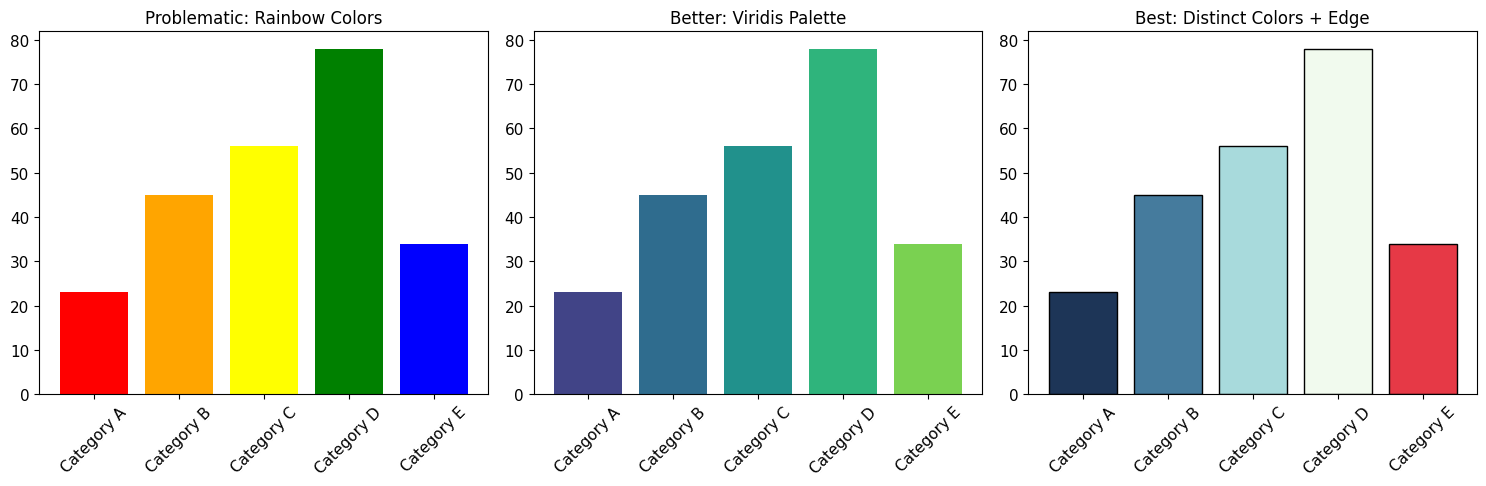

In [18]:
# Demonstrate colorblind-safe palettes

# Create sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
values = [23, 45, 56, 78, 34]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Bad: Rainbow colors (problematic for colorblind)
ax1 = axes[0]
rainbow = ['red', 'orange', 'yellow', 'green', 'blue']
ax1.bar(categories, values, color=rainbow)
ax1.set_title('Problematic: Rainbow Colors', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Better: Viridis palette (colorblind-safe)
ax2 = axes[1]
viridis = plt.cm.viridis(np.linspace(0.2, 0.8, 5))
ax2.bar(categories, values, color=viridis)
ax2.set_title('Better: Viridis Palette', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

# Best: Single color with varying intensity + patterns
ax3 = axes[2]
single_color = ['#1D3557', '#457B9D', '#A8DADC', '#F1FAEE', '#E63946']
bars = ax3.bar(categories, values, color=single_color, edgecolor='black', linewidth=1)
ax3.set_title('Best: Distinct Colors + Edge', fontsize=12)
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The comparison shows:
1. **Rainbow colors**: Red and green are hard to distinguish for colorblind viewers
2. **Viridis**: Perceptually uniform, works in grayscale too
3. **Distinct colors + edges**: Multiple visual cues beyond just color

Export formats available:
  - PNG: Raster format, good for presentations (set high dpi)
  - PDF: Vector format, perfect for publications
  - SVG: Vector format, editable in Illustrator/Inkscape
  - HTML: Plotly interactive figures


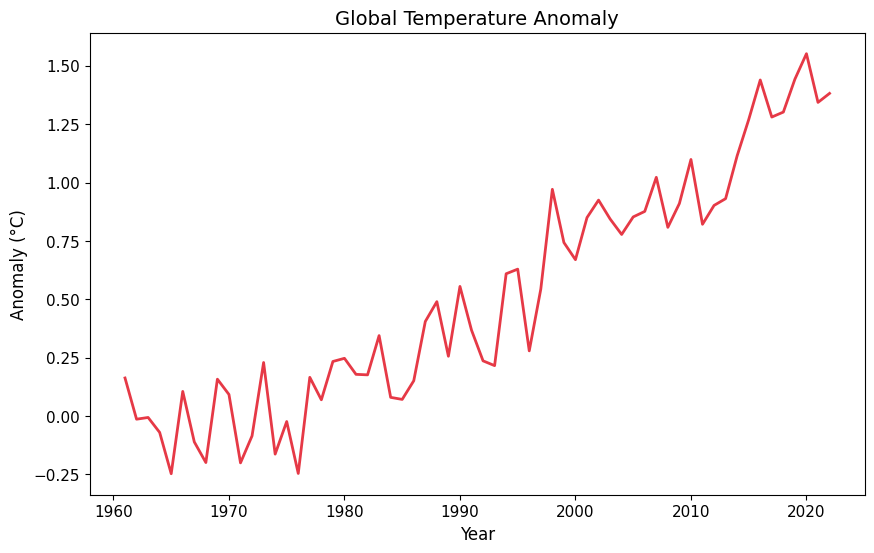

In [19]:
# Saving figures in various formats

# Create a sample figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(global_avg['year'], global_avg['temp_anomaly'], color=COLORS['accent'], linewidth=2)
ax.set_title('Global Temperature Anomaly', fontsize=14)
ax.set_xlabel('Year')
ax.set_ylabel('Anomaly (°C)')

# Save in different formats
# High-resolution PNG for presentations
# fig.savefig('temperature_trend.png', dpi=300, bbox_inches='tight')

# PDF for publications (vector format)
# fig.savefig('temperature_trend.pdf', bbox_inches='tight')

# SVG for web (vector, editable)
# fig.savefig('temperature_trend.svg', bbox_inches='tight')

print("Export formats available:")
print("  - PNG: Raster format, good for presentations (set high dpi)")
print("  - PDF: Vector format, perfect for publications")
print("  - SVG: Vector format, editable in Illustrator/Inkscape")
print("  - HTML: Plotly interactive figures")

plt.show()

Choosing the right export format depends on your use case:
- **PNG at 300 DPI**: PowerPoint, Word documents
- **PDF**: Academic papers, print materials
- **SVG**: Web, when editing is needed
- **HTML**: Interactive dashboards (Plotly)

---

## Summary: Key Takeaways

### 1. Visualization Principles
- Show the data clearly
- Facilitate comparisons
- Tell a story with each chart

### 2. Matplotlib
- Use object-oriented interface for control
- Customize with rcParams for consistency
- Clean up spines, add labels, cite sources

### 3. Chart Selection
- Line: trends over time
- Bar: categorical comparisons
- Scatter: relationships
- Histogram: distributions
- Heatmap: patterns in matrices

### 4. Plotly
- Quick interactive charts with plotly.express
- Hover, zoom, and filter built-in
- Export as HTML for sharing

### 5. Time Series
- Use rolling averages to show trends
- Area charts for cumulative effects
- Heatmaps for patterns across dimensions

### 6. Multi-Panel Figures
- Tell a complete story
- Label panels (A, B, C...)
- Use consistent styling

### 7. Storytelling
- Lead with insight in title
- Use annotations to guide attention
- Include context and source

### 8. Accessibility
- Use colorblind-safe palettes
- Don't rely on color alone
- Test your visualizations

---

## References

### Books
- Wilke, C. O. (2019). *Fundamentals of Data Visualization*. O'Reilly Media. [Free online](https://clauswilke.com/dataviz/)
- Knaflic, C. N. (2015). *Storytelling with Data*. Wiley.
- Tufte, E. R. (2001). *The Visual Display of Quantitative Information* (2nd ed.). Graphics Press.

### Documentation
- [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
- [Plotly Python Documentation](https://plotly.com/python/)
- [Seaborn (statistical visualization)](https://seaborn.pydata.org/)

### Color Resources
- [ColorBrewer 2.0](https://colorbrewer2.org/) - Colorblind-safe palettes
- [Coblis](https://www.color-blindness.com/coblis-color-blindness-simulator/) - Color blindness simulator

---

## Practice Exercises

### Exercise 1: Weather Dashboard
Create a 4-panel figure using the weather data showing: temperature distribution, humidity distribution, wind speed by condition, and a scatter plot of temperature vs. humidity.

### Exercise 2: Interactive Country Comparison
Build a Plotly dashboard that lets users select any two countries and compare their temperature anomaly trends side by side.

### Exercise 3: Publication Figure
Create a publication-ready figure showing the global temperature trend with the following requirements:
- High resolution (300 DPI)
- Colorblind-safe palette
- Clear annotations for key events
- Professional styling

### Exercise 4: Animated Visualization
Use Plotly to create an animated scatter plot showing how country temperature anomalies have changed over decades.

---

## Final Project and Course Wrap-Up

This concludes the formal lecture content for FRE 521D. On Wednesday (Feb 11), we will have final project presentations.

### What We've Covered

1. **Databases & SQL**: Schema design, queries, joins, window functions
2. **ETL Pipelines**: CSV/JSON ingestion, APIs, automation
3. **ETL Tools**: BigQuery, scheduling, monitoring
4. **Data Wrangling**: Tidy data, merges, pivots
5. **Data Cleaning**: Types, formats, deduplication, validation
6. **Visualization**: Matplotlib, Plotly, storytelling

### Skills You've Developed

- Extract data from files and APIs
- Transform messy data into analysis-ready tables
- Load data into databases and warehouses
- Validate data quality systematically
- Create compelling visualizations that tell stories

Good luck with your final projects!

---

*End of Lecture 11*